In [1]:
import numpy as np
import json
import pandas as pd
import requests
import warnings
warnings.filterwarnings('ignore')

Usando a base de dados de teste. Esta base contém dados que o modelo nunca viu, e com base nisso iremos prever as vendas das próximas seis semanas.

In [2]:
df10 = pd.read_csv('data/test.csv')
df_store_raw = pd.read_csv('data/store.csv')

Selecionando as lojas 12,22 e 24

In [3]:
df_test = pd.merge(df10, df_store_raw, how='left', on='Store')

df_test = df_test[df_test['Store'].isin( [12, 22, 24] )]

df_test = df_test[df_test['Open']!=0]
df_test = df_test[~df_test['Open'].isnull()]
df_test = df_test.drop('Id', axis=1)
df_test.head()

,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
7,12,4,2015-09-17,1.0,1,0,0,a,c,1070.0,NaN,NaN,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
15,22,4,2015-09-17,1.0,1,0,0,a,a,1040.0,NaN,NaN,1,22.0,2012.0,"Jan,Apr,Jul,Oct"
17,24,4,2015-09-17,1.0,1,0,0,a,c,4590.0,3.0,2000.0,1,40.0,2011.0,"Jan,Apr,Jul,Oct"
863,12,3,2015-09-16,1.0,1,0,0,a,c,1070.0,NaN,NaN,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
871,22,3,2015-09-16,1.0,1,0,0,a,a,1040.0,NaN,NaN,1,22.0,2012.0,"Jan,Apr,Jul,Oct"


In [64]:
df_test

,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
7,12,4,2015-09-17,1.0,1,0,0,a,c,1070.0,NaN,NaN,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
15,22,4,2015-09-17,1.0,1,0,0,a,a,1040.0,NaN,NaN,1,22.0,2012.0,"Jan,Apr,Jul,Oct"
17,24,4,2015-09-17,1.0,1,0,0,a,c,4590.0,3.0,2000.0,1,40.0,2011.0,"Jan,Apr,Jul,Oct"
863,12,3,2015-09-16,1.0,1,0,0,a,c,1070.0,NaN,NaN,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
871,22,3,2015-09-16,1.0,1,0,0,a,a,1040.0,NaN,NaN,1,22.0,2012.0,"Jan,Apr,Jul,Oct"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38535,22,1,2015-08-03,1.0,1,0,1,a,a,1040.0,NaN,NaN,1,22.0,2012.0,"Jan,Apr,Jul,Oct"
38537,24,1,2015-08-03,1.0,1,0,1,a,c,4590.0,3.0,2000.0,1,40.0,2011.0,"Jan,Apr,Jul,Oct"
40239,12,6,2015-08-01,1.0,0,0,0,a,c,1070.0,NaN,NaN,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
40247,22,6,2015-08-01,1.0,0,0,0,a,a,1040.0,NaN,NaN,1,22.0,2012.0,"Jan,Apr,Jul,Oct"


Convertendo os dados em json

In [4]:
data = json.dumps(df_test.to_dict(orient='records'))

In [6]:
url = 'http://0.0.0.0:5000/rossmann/predict'
header = {'Content-type': 'application/json' }
data = data
r = requests.post( url, data=data, headers=header )
print( 'Status Code {}'.format( r.status_code ) )

Status Code 200


In [7]:
d1 = pd.DataFrame( r.json(), columns=r.json()[0].keys() )

In [24]:
d1

,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,...,Year,Month,Day,WeekOfYear,YearWeek,CompetitionSince,CompetitionTimeMonth,PromoSince,PromoTimeWeek,Prediction
0,12,4,2015-09-17T00:00:00.000,1.0,1,RegularDay,0,a,extended,1070.0,...,2015,9,17,38,2015-37,2015-09-01T00:00:00.000,0,2010-03-22T00:00:00.000,286,6277.165039
1,22,4,2015-09-17T00:00:00.000,1.0,1,RegularDay,0,a,basic,1040.0,...,2015,9,17,38,2015-37,2015-09-01T00:00:00.000,0,2012-05-21T00:00:00.000,173,4032.959229
2,24,4,2015-09-17T00:00:00.000,1.0,1,RegularDay,0,a,extended,4590.0,...,2015,9,17,38,2015-37,2000-03-01T00:00:00.000,189,2011-09-26T00:00:00.000,207,7765.870117
3,12,3,2015-09-16T00:00:00.000,1.0,1,RegularDay,0,a,extended,1070.0,...,2015,9,16,38,2015-37,2015-09-01T00:00:00.000,0,2010-03-22T00:00:00.000,286,6478.487793
4,22,3,2015-09-16T00:00:00.000,1.0,1,RegularDay,0,a,basic,1040.0,...,2015,9,16,38,2015-37,2015-09-01T00:00:00.000,0,2012-05-21T00:00:00.000,173,4336.441895
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,22,1,2015-08-03T00:00:00.000,1.0,1,RegularDay,1,a,basic,1040.0,...,2015,8,3,32,2015-31,2015-08-01T00:00:00.000,0,2012-05-21T00:00:00.000,167,5986.902344
118,24,1,2015-08-03T00:00:00.000,1.0,1,RegularDay,1,a,extended,4590.0,...,2015,8,3,32,2015-31,2000-03-01T00:00:00.000,187,2011-09-26T00:00:00.000,201,10451.472656
119,12,6,2015-08-01T00:00:00.000,1.0,0,RegularDay,0,a,extended,1070.0,...,2015,8,1,31,2015-30,2015-08-01T00:00:00.000,0,2010-03-22T00:00:00.000,279,4372.662598
120,22,6,2015-08-01T00:00:00.000,1.0,0,RegularDay,0,a,basic,1040.0,...,2015,8,1,31,2015-30,2015-08-01T00:00:00.000,0,2012-05-21T00:00:00.000,166,2530.403809


### Visualizando as previsões

In [10]:
d2 = d1[['Store', 'Prediction']].groupby( 'Store' ).sum().reset_index()
for i in range( len( d2 ) ):
    print( 'Store Number {} will sell R${:,.2f} in the next 6 weeks'.format(
    d2.loc[i, 'Store'],
    d2.loc[i, 'Prediction'] ) )

Store Number 12 will sell R$242,099.52 in the next 6 weeks
Store Number 22 will sell R$156,012.32 in the next 6 weeks
Store Number 24 will sell R$285,706.76 in the next 6 weeks


In [44]:
import plotly.express as px

In [12]:
d2.head()

,Store,Prediction
0,12,242099.524414
1,22,156012.317139
2,24,285706.756348


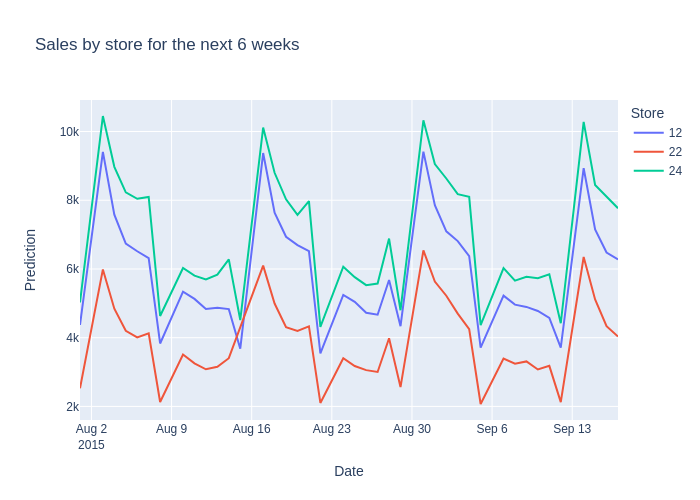

In [43]:
fig = px.line(d1, x="Date", y="Prediction", color='Store',title='Sales by store for the next 6 weeks')

fig.show('png')